# PyLab 5: Random Number Analysis
#### Author: Ayush Pandhi (1003227457)
#### Due Date: October 23, 2018

In [87]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson

In [88]:
#Loading the radioactive decay data file
sample = np.loadtxt('TuesdayPMPlate_20181009.txt', skiprows=2, usecols=(0,))
count = np.loadtxt('TuesdayPMPlate_20181009.txt', skiprows=2, usecols=(1,))

#Loading the background radiation data file
sample_bg = np.loadtxt('TuesdayPMBackground_20181009.txt', skiprows=2, usecols=(0,))
count_bg = np.loadtxt('TuesdayPMBackground_20181009.txt', skiprows=2, usecols=(1,))

#Getting the mean background radiation
mean_count_bg = np.mean(count_bg)

#Adjusting decay data count by subtracting mean background count
count = count - mean_count_bg

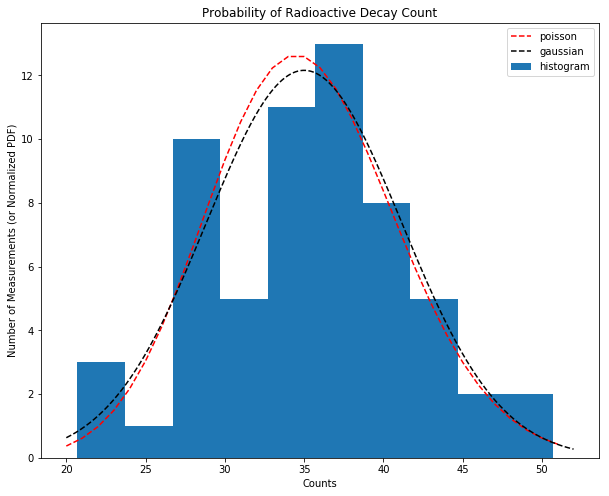

In [89]:
#Histogram for the Fiesta Plate data
plt.figure(figsize=(10,8))
plt.hist(count, bins=10, label='histogram')

#Adding in the Poisson Distribution
xlin = np.arange(20, 52)
mu = np.mean(count)
pd = poisson(mu)
plt.plot(xlin, 186*(pd.pmf(xlin)/np.sum(pd.pmf(xlin))/(xlin[1] - xlin[0])), 'r--', label='poisson')

#Adding in the Gaussian Distribution
xlin2 = np.linspace(20, 52, 1000)
stddev = np.std(count)
gd = norm(mu, stddev)
plt.plot(xlin2, 186*(gd.pdf(xlin2)/np.sum(gd.pdf(xlin2))/(xlin2[1] - xlin2[0])), 'k--', label='gaussian')

#Plot title, legend, labels
plt.title('Probability of Radioactive Decay Count')
plt.xlabel('Counts')
plt.ylabel('Number of Measurements (or Normalized PDF)')
plt.legend()
plt.show()

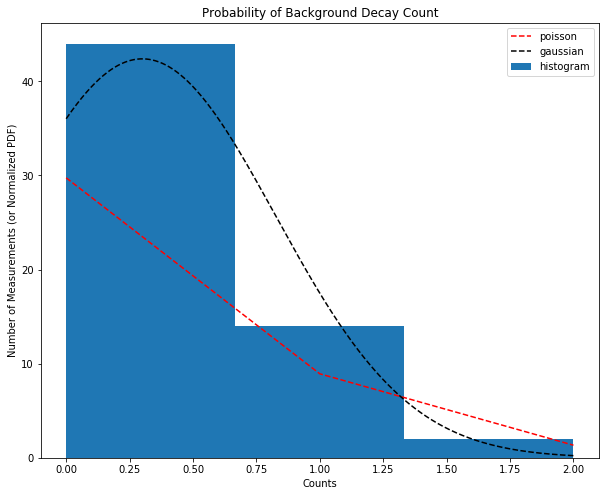

In [90]:
#Histogram for the background data
plt.figure(figsize=(10,8))
plt.hist(count_bg, bins=3, label='histogram')

#Adding in the Poisson Distribution
xlin = np.arange(0, 3)
mu_bg = np.mean(count_bg)
pd_bg = poisson(mu_bg)
plt.plot(xlin, 40*(pd_bg.pmf(xlin)/np.sum(pd_bg.pmf(xlin))/(xlin[1] - xlin[0])), 'r--', label='poisson')

#Adding in the Gaussian Distribution
xlin2 = np.linspace(0, 2, 1000)
stddev_bg = np.std(count_bg)
gd_bg = norm(mu_bg, stddev_bg)
plt.plot(xlin2, 40*(gd_bg.pdf(xlin2)/np.sum(gd_bg.pdf(xlin2))/(xlin2[1] - xlin2[0])), 'k--', label='gaussian')

#Plot title, legend, labels
plt.title('Probability of Background Decay Count')
plt.xlabel('Counts')
plt.ylabel('Number of Measurements (or Normalized PDF)')
plt.legend()
plt.show()